# How to parsing the PEt dataset

### You cloud download at https://www.robots.ox.ac.uk/~vgg/data/pets/

### Load the datas

In [135]:
import os

#### Current Directory Path

In [136]:
cur_data = os.getcwd()

#### Load the dir path

In [241]:
img_dir = os.path.join(cur_data,'images') # inputs
bbox_dir =  os.path.join(cur_data,'annotations/xmls') # Outputs
trimap_dir = os.path.join(cur_data,'annotations/trimaps') #Outputs

In [242]:
img_dir

'/home/nvidia/Desktop/DeepLearningTutorial/Code/images'

In [243]:
bbox_dir

'/home/nvidia/Desktop/DeepLearningTutorial/Code/annotations/xmls'

In [244]:
trimap_dir

'/home/nvidia/Desktop/DeepLearningTutorial/Code/annotations/trimaps'

#### Load the file at the list

In [245]:
image_test = os.listdir(img_dir)

In [246]:
len(image_test)

7393

In [247]:
os.path.splitext(os.listdir(img_dir)[0])

('scottish_terrier_44', '.jpg')

#### Load the training datasets

In [248]:
image_files = [fname for fname in os.listdir(img_dir) if os.path.splitext(fname)[-1] == ".jpg"]

In [249]:
len(image_files)

7390

#### Load the xml bounding box label

In [250]:
bbox_files = [fname for fname in os.listdir(bbox_dir) if os.path.splitext(fname)[-1] == ".xml"]

In [251]:
len(bbox_files)

3686

#### Load the trimap png files

In [252]:
trimap_files = [fname for fname in os.listdir(trimap_dir) if os.path.splitext(fname)[-1] == '.png']

In [253]:
len(trimap_files)

7390

#### Check the file names

In [254]:
image_files[:10]

['scottish_terrier_44.jpg',
 'Birman_103.jpg',
 'wheaten_terrier_146.jpg',
 'Siamese_195.jpg',
 'Bombay_208.jpg',
 'Bengal_135.jpg',
 'pug_118.jpg',
 'Bombay_107.jpg',
 'Maine_Coon_238.jpg',
 'english_cocker_spaniel_96.jpg']

In [255]:
bbox_files[:10]

['beagle_183.xml',
 'american_pit_bull_terrier_128.xml',
 'Ragdoll_155.xml',
 'basset_hound_110.xml',
 'Birman_186.xml',
 'British_Shorthair_119.xml',
 'British_Shorthair_157.xml',
 'english_cocker_spaniel_10.xml',
 'english_cocker_spaniel_179.xml',
 'miniature_pinscher_122.xml']

In [256]:
trimap_files[:10]

['havanese_89.png',
 'english_setter_96.png',
 'Ragdoll_254.png',
 'pomeranian_63.png',
 'Maine_Coon_254.png',
 'chihuahua_46.png',
 'yorkshire_terrier_31.png',
 'keeshond_116.png',
 'german_shorthaired_60.png',
 'Bombay_176.png']

### Let's Draw and CHeck the files

In [257]:
import numpy as np
import random
from PIL import Image
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

#### add file name and directory path 

In [258]:
random_index = random.randint(1,len(image_files))
random_index

6048

In [259]:
random_index

6048

#### Make Image full path

In [260]:
file_name = image_files[random_index]

In [261]:
file_name

'saint_bernard_175.jpg'

In [262]:
img_dir

'/home/nvidia/Desktop/DeepLearningTutorial/Code/images'

In [263]:
image_path = os.path.join(img_dir,file_name)
image_path

'/home/nvidia/Desktop/DeepLearningTutorial/Code/images/saint_bernard_175.jpg'

#### Make xml full path

In [264]:
bbox_path = os.path.join(bbox_dir,os.path.splitext(file_name)[0]+'.xml')
bbox_path

'/home/nvidia/Desktop/DeepLearningTutorial/Code/annotations/xmls/saint_bernard_175.xml'

#### Make the trimaps path

In [265]:
trimap_path = os.path.join(trimap_dir,os.path.splitext(file_name)[0]+'.png')
trimap_path

'/home/nvidia/Desktop/DeepLearningTutorial/Code/annotations/trimaps/saint_bernard_175.png'

#### Draw the image

In [266]:
image_path

'/home/nvidia/Desktop/DeepLearningTutorial/Code/images/saint_bernard_175.jpg'

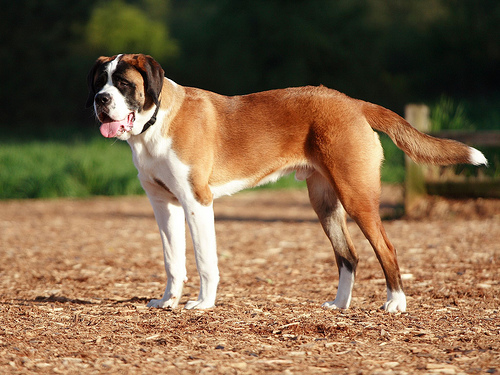

In [267]:
image = Image.open(image_path)
image

In [268]:
image = np.array(image)
image

array([[[ 14,  16,  13],
        [ 13,  18,  14],
        [ 12,  18,  14],
        ...,
        [ 13,  20,  13],
        [ 10,  20,  12],
        [ 10,  20,  12]],

       [[ 14,  16,  13],
        [ 12,  17,  13],
        [ 11,  17,  13],
        ...,
        [ 12,  22,  14],
        [ 12,  22,  14],
        [ 11,  21,  13]],

       [[ 14,  16,  13],
        [ 11,  16,  12],
        [ 10,  16,  12],
        ...,
        [ 11,  22,  14],
        [ 12,  23,  15],
        [ 12,  23,  15]],

       ...,

       [[202, 165, 123],
        [192, 150, 108],
        [181, 133,  93],
        ...,
        [160, 104,  77],
        [173, 120,  89],
        [172, 122,  87]],

       [[190, 153, 109],
        [203, 162, 118],
        [201, 150, 107],
        ...,
        [164, 107,  77],
        [167, 112,  81],
        [163, 110,  76]],

       [[179, 136,  94],
        [196, 149, 107],
        [196, 143, 101],
        ...,
        [172, 111,  80],
        [167, 108,  78],
        [159, 102,  72]]

#### Parsing the pascal xml files
- if there is no xml files, play again. because not all bounding box is made

In [269]:
tree = et.parse(bbox_path)

#### Let's parsing the xml files

```
<object>
<name>cat</name>
<pose>Frontal</pose>
<truncated>0</truncated>
<occluded>0</occluded>
<bndbox>
<xmin>333</xmin>
<ymin>72</ymin>
<xmax>425</xmax>
<ymax>158</ymax>
</bndbox>
<difficult>0</difficult>
</object>

<size>
<width>600</width>
<height>400</height>
<depth>3</depth>
</size>
```

#### parsing the xml

In [277]:
width = float(tree.find('./size/width').text)
height = float(tree.find('./size/height').text)

x_min = float(tree.find('./object/bndbox/xmin').text)
y_min = float(tree.find('./object/bndbox/ymin').text)
x_max = float(tree.find('./object/bndbox/xmax').text)
y_max = float(tree.find('./object/bndbox/ymax').text)

#### Draw rectangle

In [295]:
rect_x = x_min
rect_y = y_min
rect_w = x_max-x_min
rect_h = y_max-y_min
rect = Rectangle((rect_x,rect_y),rect_w,rect_h,fill = False, color = 'red')

#### add rectangle to the image

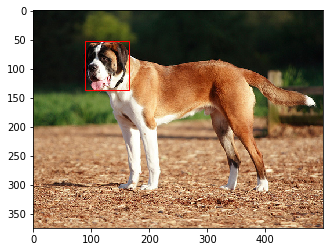

In [296]:
plt.axes().add_patch(rect)
plt.imshow(image)

In [297]:
trimap_files

['havanese_89.png',
 'english_setter_96.png',
 'Ragdoll_254.png',
 'pomeranian_63.png',
 'Maine_Coon_254.png',
 'chihuahua_46.png',
 'yorkshire_terrier_31.png',
 'keeshond_116.png',
 'german_shorthaired_60.png',
 'Bombay_176.png',
 'Egyptian_Mau_174.png',
 'Bombay_32.png',
 'shiba_inu_36.png',
 'Siamese_238.png',
 'havanese_131.png',
 'pomeranian_148.png',
 'Persian_1.png',
 'staffordshire_bull_terrier_30.png',
 'Ragdoll_9.png',
 'Bombay_129.png',
 'saint_bernard_103.png',
 'miniature_pinscher_56.png',
 'leonberger_87.png',
 'english_cocker_spaniel_132.png',
 'basset_hound_134.png',
 'shiba_inu_143.png',
 'Persian_186.png',
 'Birman_19.png',
 'boxer_195.png',
 'scottish_terrier_109.png',
 'samoyed_134.png',
 'yorkshire_terrier_49.png',
 'american_bulldog_217.png',
 'basset_hound_118.png',
 'Egyptian_Mau_183.png',
 'newfoundland_190.png',
 'american_bulldog_196.png',
 'Bombay_13.png',
 'scottish_terrier_116.png',
 'beagle_29.png',
 'Sphynx_78.png',
 'great_pyrenees_148.png',
 'Sphynx_59

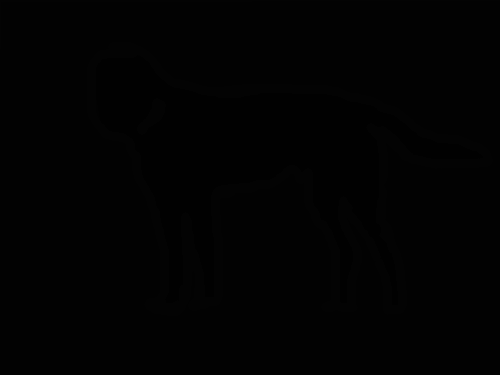

In [301]:
trimap_image = Image.open(trimap_path)
trimap_image

In [302]:
trimap_image = np.array(trimap_image)

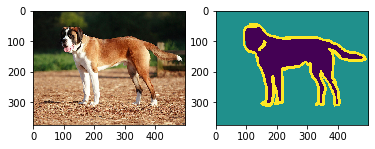

In [304]:
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(trimap_image)